In [32]:
from sklearn import datasets
import numpy as np
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
std_scale = preprocessing.StandardScaler().fit(X)
X_std = std_scale.transform(X)
minmax_scale = preprocessing.MinMaxScaler().fit(X)
X_minmax = minmax_scale.transform(X)

In [5]:
X_std

array([[-1.34022653e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.31544430e+00],
       [-1.39706395e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.31544430e+00],
       [-1.16971425e+00, -1.05217993e+00],
       [-1.34022653e+00, -1.18381211e+00],
       [-1.28338910e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.44707648e+00],
       [-1.28338910e+00, -1.31544430e+00],
       [-1.22655167e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.44707648e+00],
       [-1.51073881e+00, -1.44707648e+00],
       [-1.45390138e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.05217993e+00],
       [-1.39706395e+00, -1.05217993e+00],
       [-1.34022653e+00, -1.18381211e+00],
       [-1.16971425e+00, -1.18381211e+00],
       [-1.28338910e+00, -1.18381211e+00],
       [-1.16971425e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.05217993e+00],
       [-1.56757623e+00, -1.31544430e+00],
       [-1.

In [6]:
X_minmax

array([[0.06779661, 0.04166667],
       [0.06779661, 0.04166667],
       [0.05084746, 0.04166667],
       [0.08474576, 0.04166667],
       [0.06779661, 0.04166667],
       [0.11864407, 0.125     ],
       [0.06779661, 0.08333333],
       [0.08474576, 0.04166667],
       [0.06779661, 0.04166667],
       [0.08474576, 0.        ],
       [0.08474576, 0.04166667],
       [0.10169492, 0.04166667],
       [0.06779661, 0.        ],
       [0.01694915, 0.        ],
       [0.03389831, 0.04166667],
       [0.08474576, 0.125     ],
       [0.05084746, 0.125     ],
       [0.06779661, 0.08333333],
       [0.11864407, 0.08333333],
       [0.08474576, 0.08333333],
       [0.11864407, 0.04166667],
       [0.08474576, 0.125     ],
       [0.        , 0.04166667],
       [0.11864407, 0.16666667],
       [0.15254237, 0.04166667],
       [0.10169492, 0.04166667],
       [0.10169492, 0.125     ],
       [0.08474576, 0.04166667],
       [0.06779661, 0.04166667],
       [0.10169492, 0.04166667],
       [0.

In [14]:
iris = datasets.load_iris()

iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
columns= iris['feature_names'] + ['species'])

In [15]:
# iris.species = np.where(iris.species == 0.0, 'setosa', np.where(iris.species==1.0,'versicolor', 'virginica'))
iris.columns = iris.columns.str.replace('','')
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [16]:
print(iris['species'].value_counts())

species
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64


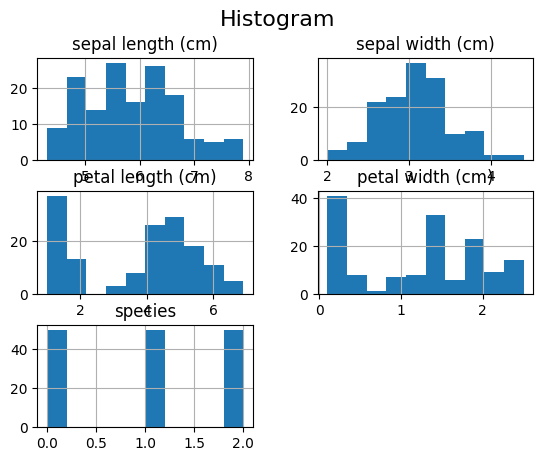

In [ ]:
iris.hist() 
plt.suptitle("Histogram", fontsize=16)
plt.show()

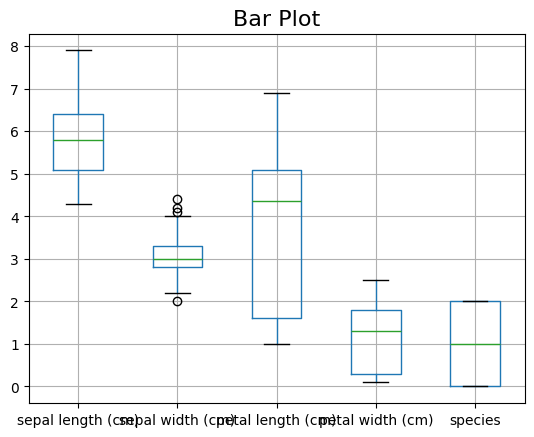

In [18]:
iris.boxplot() # boxplot
plt.title("Bar Plot", fontsize=16)
plt.show()

In [30]:
iris.groupby(by = "species").mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
0.0,5.006,3.428,1.462,0.246
1.0,5.936,2.770,4.260,1.326
2.0,6.588,2.974,5.552,2.026


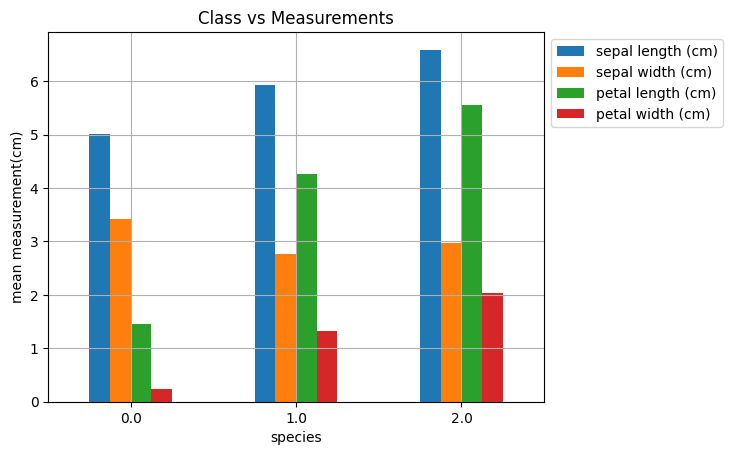

In [ ]:
#   mean of each feature for each label class
iris.groupby(by = "species").mean().plot(kind="bar")
plt.title('Class vs Measurements')
plt.ylabel('mean measurement(cm)')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

In [29]:
# correlation matrix
corr = iris.corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


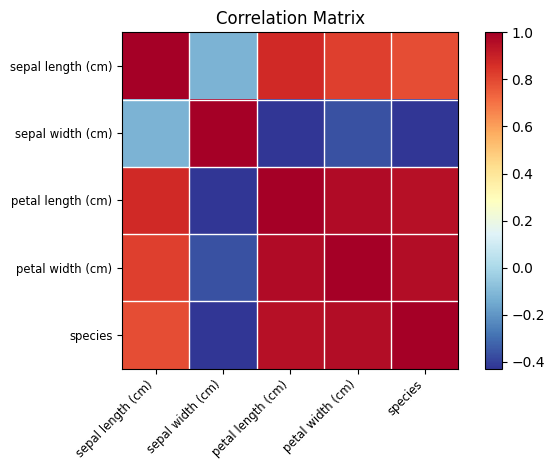

In [28]:
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [ ]:
feature_vector = np.array([1, 2, 3, 4, 5])

mean = np.mean(feature_vector)
variance = np.var(feature_vector)

print("Mean:", mean)
print("Variance:", variance)

Mean: 3.0
Variance: 2.0


In [35]:
vector1 = np.array([1, 2, 3])
vector2 = np.array([4, 5, 6])

covariance = np.cov(vector1, vector2)[0, 1]

print("Covariance:", covariance)

Covariance: 1.0


In [36]:
vector1 = np.array([1, 2, 3])
vector2 = np.array([4, 5, 6])

correlation = np.corrcoef(vector1, vector2)[0, 1]

print("Correlation:", correlation)

Correlation: 1.0


In [37]:
feature_matrix = np.array([[1, 2, 3],
                           [4, 5, 6],
                           [7, 8, 9]])

covariance_matrix = np.cov(feature_matrix.T)

correlation_matrix = np.corrcoef(feature_matrix.T)

print("Covariance Matrix:\n", covariance_matrix)
print("Correlation Matrix:\n", correlation_matrix)

Covariance Matrix:
 [[9. 9. 9.]
 [9. 9. 9.]
 [9. 9. 9.]]
Correlation Matrix:
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
